## Evaluation Report from `eval_metrics.json`

This section loads a saved `eval_metrics.json` file produced by the evaluation
script and visualizes:

- Global metrics (pixel accuracy, mean IoU, macro scores)
- Per-class metrics in a table (IoU, precision, recall, Dice/F1, support)
- Per-class IoU and Dice as bar plots
- Confusion matrix as a heatmap




In [1]:
from pathlib import Path
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Must match the order used during training/eval
CLASS_NAMES = [
    "background",          # 0
    "Bridge",              # 1
    "Building",            # 2
    "Cottage",             # 3
    "Dam",                 # 4
    "Haystack",            # 5
    "House",               # 6
    "Irrigation Channel",  # 7
    "Road",                # 8
    "Temple",              # 9
    "Wall",                # 10
    "log",                 # 11
]

NUM_CLASSES = len(CLASS_NAMES)

# Path to the metrics file you want to visualize
METRICS_JSON_PATH = Path("eval_metrics.json")  # adjust if needed

with METRICS_JSON_PATH.open("r") as f:
    metrics = json.load(f)

# Convert lists to numpy arrays for convenience
confusion_matrix = np.array(metrics["confusion_matrix"])
iou = np.array(metrics["iou"])
precision = np.array(metrics["precision"])
recall = np.array(metrics["recall"])
f1 = np.array(metrics["f1"])       # per-class Dice
support = np.array(metrics["support"])

pixel_accuracy = metrics["pixel_accuracy"]
mean_iou = metrics["mean_iou"]
macro_precision = metrics["macro_precision"]
macro_recall = metrics["macro_recall"]
macro_f1 = metrics["macro_f1"]     # also macro Dice (incl. background)

# Some handy extra derived metrics
macro_dice_incl_bg = macro_f1
if NUM_CLASSES > 1:
    macro_dice_excl_bg = float(f1[1:].mean())
else:
    macro_dice_excl_bg = macro_dice_incl_bg

hard_dice_loss = 1.0 - macro_dice_incl_bg

print("[INFO] Loaded metrics from:", METRICS_JSON_PATH.resolve())


[INFO] Loaded metrics from: /home/basnyat/shared/Final/eval_metrics.json


In [2]:
print("===== GLOBAL METRICS =====")
print(f"Overall pixel accuracy         : {pixel_accuracy:.4f}")
print(f"Mean IoU                       : {mean_iou:.4f}")
print(f"Macro Precision                : {macro_precision:.4f}")
print(f"Macro Recall                   : {macro_recall:.4f}")
print(f"Macro F1 (macro Dice, incl bg) : {macro_f1:.4f}")
print(f"Macro Dice (incl background)   : {macro_dice_incl_bg:.4f}")
print(f"Macro Dice (excl background)   : {macro_dice_excl_bg:.4f}")
print(f"Hard Dice loss (1 - macroDice) : {hard_dice_loss:.44f}")
print()

print("Total pixels in confusion matrix:", confusion_matrix.sum())


===== GLOBAL METRICS =====
Overall pixel accuracy         : 0.9014
Mean IoU                       : 0.3575
Macro Precision                : 0.3884
Macro Recall                   : 0.5273
Macro F1 (macro Dice, incl bg) : 0.4247
Macro Dice (incl background)   : 0.4247
Macro Dice (excl background)   : 0.3774
Hard Dice loss (1 - macroDice) : 0.57529703415695521151462799025466665625572205

Total pixels in confusion matrix: 18874368


In [3]:
per_class_df = pd.DataFrame({
    "Class ID": list(range(NUM_CLASSES)),
    "Class Name": CLASS_NAMES,
    "Support (GT pixels)": support,
    "IoU": iou,
    "Precision": precision,
    "Recall": recall,
    "Dice (F1)": f1,
})

# Sort by class ID (or change to sort by IoU/Dice if you like)
per_class_df


,Class ID,Class Name,Support (GT pixels),IoU,Precision,Recall,Dice (F1)
0,0,background,17478434,0.895675,0.993653,0.900830,0.944967
1,1,Bridge,0,0.000000,0.000000,0.000000,0.000000
2,2,Building,47036,0.647651,0.766660,0.806659,0.786151
3,3,Cottage,4588,0.451776,0.482647,0.875981,0.622377
4,4,Dam,0,0.000000,0.000000,0.000000,0.000000
5,5,Haystack,26384,0.505931,0.508272,0.990979,0.671918
6,6,House,420255,0.800999,0.883235,0.895866,0.889505
7,7,Irrigation Channel,44280,0.159785,0.162512,0.904946,0.275542
8,8,Road,821408,0.828113,0.863461,0.952893,0.905976
9,9,Temple,13792,0.000000,0.000000,0.000000,0.000000


# Sorted

In [4]:
per_class_df.sort_values("Dice (F1)")


,Class ID,Class Name,Support (GT pixels),IoU,Precision,Recall,Dice (F1)
1,1,Bridge,0,0.000000,0.000000,0.000000,0.000000
4,4,Dam,0,0.000000,0.000000,0.000000,0.000000
9,9,Temple,13792,0.000000,0.000000,0.000000,0.000000
10,10,Wall,0,0.000000,0.000000,0.000000,0.000000
11,11,log,18191,0.000000,0.000000,0.000000,0.000000
7,7,Irrigation Channel,44280,0.159785,0.162512,0.904946,0.275542
3,3,Cottage,4588,0.451776,0.482647,0.875981,0.622377
5,5,Haystack,26384,0.505931,0.508272,0.990979,0.671918
2,2,Building,47036,0.647651,0.766660,0.806659,0.786151
6,6,House,420255,0.800999,0.883235,0.895866,0.889505


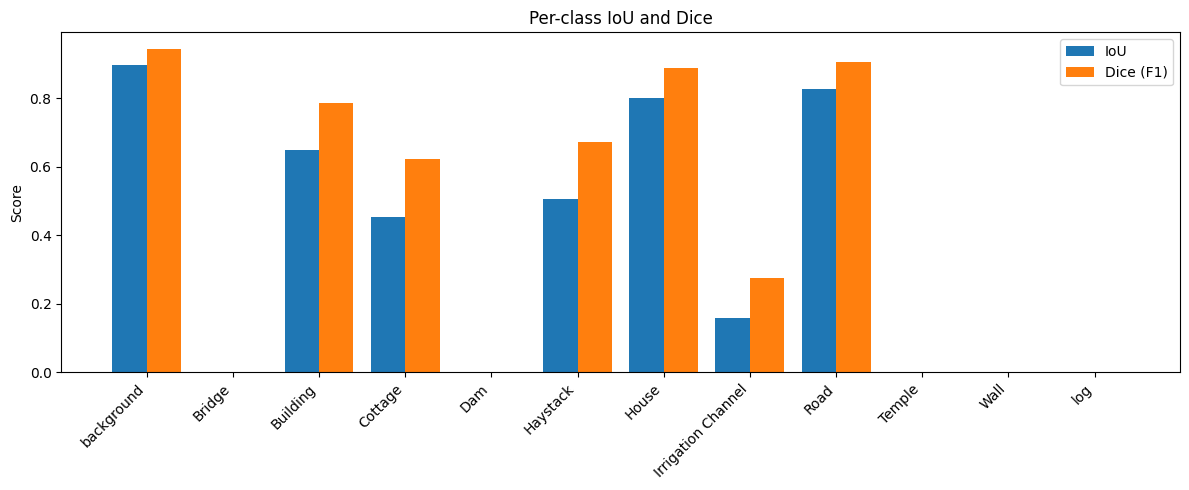

In [5]:
x = np.arange(NUM_CLASSES)

plt.figure(figsize=(12, 5))
plt.bar(x - 0.2, iou, width=0.4, label="IoU")
plt.bar(x + 0.2, f1, width=0.4, label="Dice (F1)")
plt.xticks(x, CLASS_NAMES, rotation=45, ha="right")
plt.ylabel("Score")
plt.title("Per-class IoU and Dice")
plt.legend()
plt.tight_layout()
plt.show()


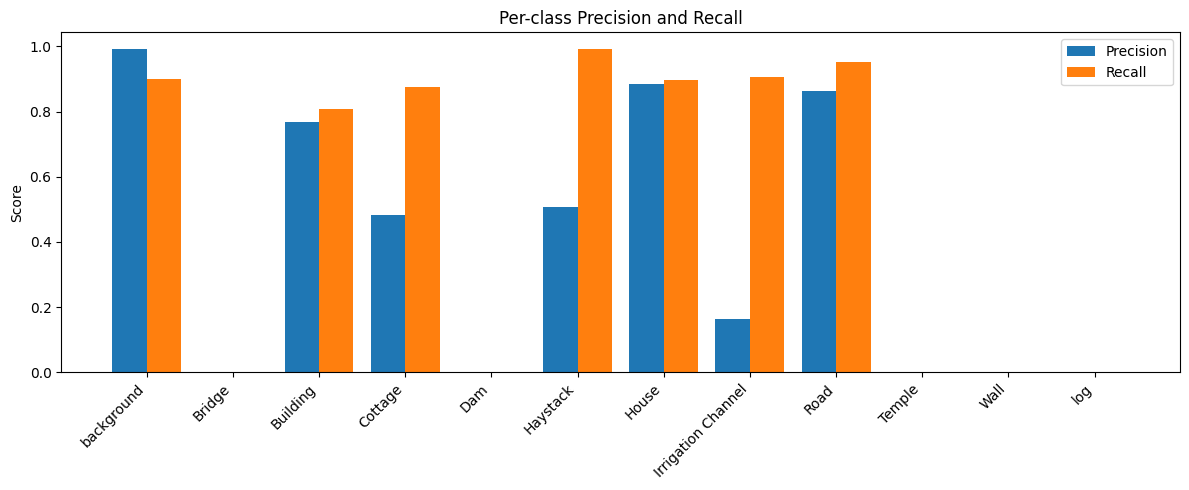

In [6]:
plt.figure(figsize=(12, 5))
plt.bar(x - 0.2, precision, width=0.4, label="Precision")
plt.bar(x + 0.2, recall, width=0.4, label="Recall")
plt.xticks(x, CLASS_NAMES, rotation=45, ha="right")
plt.ylabel("Score")
plt.title("Per-class Precision and Recall")
plt.legend()
plt.tight_layout()
plt.show()


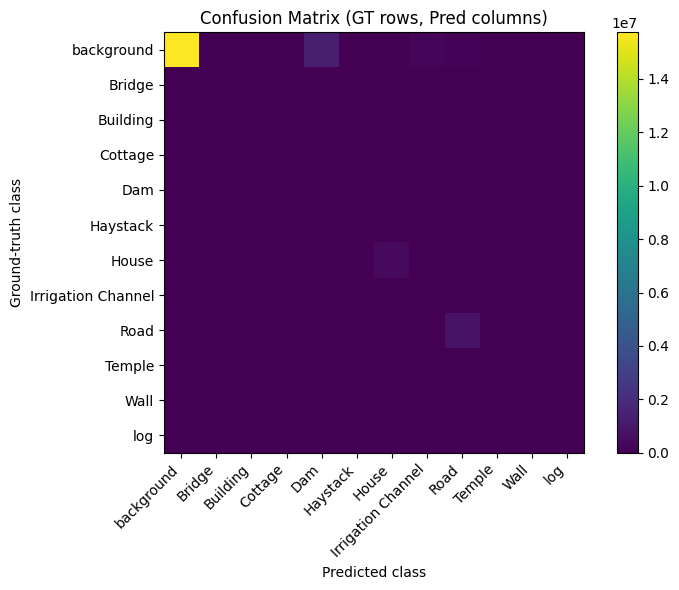

In [7]:
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix, interpolation="nearest")
plt.title("Confusion Matrix (GT rows, Pred columns)")
plt.colorbar()
plt.xticks(np.arange(NUM_CLASSES), CLASS_NAMES, rotation=45, ha="right")
plt.yticks(np.arange(NUM_CLASSES), CLASS_NAMES)
plt.xlabel("Predicted class")
plt.ylabel("Ground-truth class")
plt.tight_layout()
plt.show()


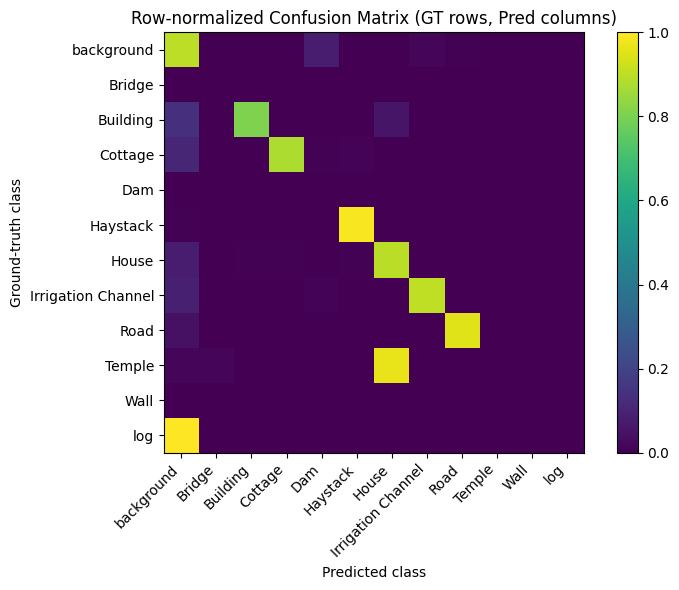

In [8]:
row_sums = confusion_matrix.sum(axis=1, keepdims=True)
row_sums[row_sums == 0] = 1  # to avoid division by zero
conf_norm = confusion_matrix / row_sums

plt.figure(figsize=(8, 6))
plt.imshow(conf_norm, interpolation="nearest")
plt.title("Row-normalized Confusion Matrix (GT rows, Pred columns)")
plt.colorbar()
plt.xticks(np.arange(NUM_CLASSES), CLASS_NAMES, rotation=45, ha="right")
plt.yticks(np.arange(NUM_CLASSES), CLASS_NAMES)
plt.xlabel("Predicted class")
plt.ylabel("Ground-truth class")
plt.tight_layout()
plt.show()
